In [2]:
import numpy as np
import pandas as pd
from ultralytics import YOLO
import cv2
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
IMG_PATH = ""

In [ ]:
# create model using pretrained yolov8
model = YOLO("yolov8n.pt") 

In [ ]:
results=model.predict(source=IMG_PATH,save=True, conf=0.2,iou=0.5)
# conf: object confidence threshold for detection
#Iou: intersection over union threshold for Non Max Supression

In [ ]:
results
#as you can see below, Results object contains 5 components:
# boxes : they are object with properties for manipulating bounding boxes.
# masks : masks object indexing masks or getting segment coordinates
# keypoints : keypoint object for with properties and methods for manipulating predicted keypoints
# probs : pobs object for containing class probabilities
# orig_img : original image loaded in memory
# path :  path to the input image 

In [ ]:
result = results[0]

# finding the detailed result(Class, Coordinates, Prob)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

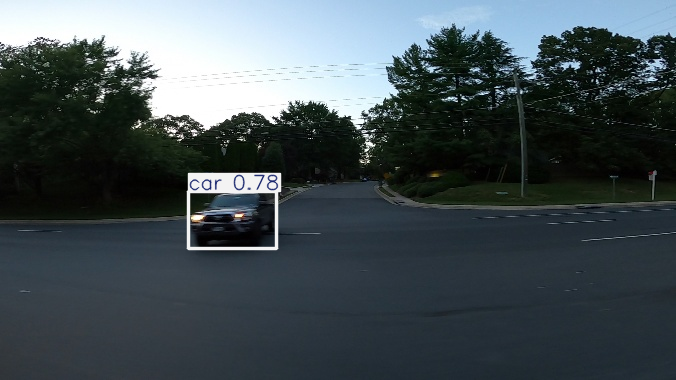

In [8]:
# Plotting results
res_plotted = results[0].plot()
res_plotted = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)   #opencv uses BGR color format, while other image libraries (e.g. Image) uses RGB. So we need a conversion from BGR to RGB
display(Image.fromarray(res_plotted)) # .fromarray is used to create image from numpy array